In [39]:
using Clapeyron
using Plots
using CSV
using DataFrames
using LaTeXStrings

Set Up the Model

In [80]:
model_mix = SAFTgammaMie([("MEA",["NH2"=>1, "CH2"=>1, "CH2OH"=>1]),("Water",["H2O"=>1]),("Carbon Dioxide",["CO2"=>1])];

        userlocations = (Mw = [16.02285, 14.02658, 31.03392, 18.01528, 44.01],

        epsilon = [284.78 348.39 528.21 339.89 134.58;

                   348.39 473.39 423.17 423.63 276.45;

                   528.21 423.17 407.22 358.02 312.3;

                   339.89 423.63 358.02 266.68 226.38;
                   
                   134.58 276.45 312.3 226.38 207.89],

        sigma = [3.2477, 4.8801, 3.4054, 3.0063, 3.05],

        lambda_a = [6, 6, 6, 6, 5.055],

        lambda_r = [10.354 14.063 52.305 13.085 50.06;

                    14.063 19.871 21.230 100.00 22.873;

                    52.305 21.230 22.699 19.619 24.474;

                    13.085 100.00 19.619 17.020 21.116;
            
                    50.06  22.873 24.474 21.116 26.408],

        vst = [1, 1, 2, 1, 2],

        S = [0.79675, 0.22932, 0.58538, 1, 0.84680],

        n_H=[2, 0, 1, 2, 0],

        n_e=[1, 0, 2, 2, 0],

        n_a1=[0, 0, 0, 0, 1],

        #n_a1e=[1, 0, 0, 1, 0],

        n_a2=[0, 0, 0, 0, 1],

        #n_a2e=[1, 0, 0, 0, 0],

        epsilon_assoc = Dict([(("NH2","H"),("NH2","e")) => 1070.80,

                              (("NH2","H"),("CH2OH","e")) => 629.88,

                              (("NH2","H"),("H2O","e")) => 1364.40,

                              (("CH2OH","H"),("NH2","e")) => 2403.78,

                              (("CH2OH","H"),("CH2OH","e")) => 2097.90,

                              (("CH2OH","H"),("H2O","e")) => 600.00,

                              (("H2O","H"),("NH2","e")) => 1877.50,

                              (("H2O","H"),("CH2OH","e")) => 2000.6,

                              (("H2O","H"),("H2O","e")) => 1985.40,

                              (("CO2","a1"),("NH2","e")) => 3313,
                
                              (("CO2","a1"),("H2O","e")) => 1398.1,
                 
                              (("CO2","a2"),("NH2","e")) => 4943.6]),
                
                              #(("CO2","a1"),("NH2","a1e")) => 3313,
                
                              #(("CO2","a1"),("H2O","a1e")) => 1398.1,
                 
                              #(("CO2","a2"),("NH2","a2e")) => 4943.6]),
        

        bondvol = Dict([(("NH2","H"),("NH2","e")) => 95.225e-30,

                              (("NH2","H"),("CH2OH","e")) => 346.08e-30,

                              (("NH2","H"),("H2O","e")) => 22.450e-30,

                              (("CH2OH","H"),("NH2","e")) => 26.192e-30,

                              (("CH2OH","H"),("CH2OH","e")) => 62.309e-30,

                              (("CH2OH","H"),("H2O","e")) => 490.19e-30,

                              (("H2O","H"),("NH2","e")) => 459.18e-30,

                              (("H2O","H"),("CH2OH","e")) => 130.02e-30,

                              (("H2O","H"),("H2O","e")) => 101.69e-30,

                              (("CO2","a1"),("NH2","e")) => 3280.3e-30,
                
                              (("CO2","a1"),("H2O","e")) => 91.419e-30,
                 
                              (("CO2","a2"),("NH2","e")) => 142.64e-30])));
                
                              #(("CO2","a1"),("NH2","a1e")) => 3280.3e-30,
                
                              #(("CO2","a1"),("H2O","a1e")) => 91.419e-30,
                 
                              #(("CO2","a2"),("NH2","a2e")) => 142.64e-30])));

Create the composition of the liquid phase

In [83]:
wt_MEA = 0.3
wt_H2O = 1-wt_MEA

mw_MEA = 61.08
mw_H2O = 18.01528

x_MEA = (wt_MEA/mw_MEA)*(1/((wt_MEA/mw_MEA)+(wt_H2O/mw_H2O)))
x_H2O = 1-x_MEA

#now create a vector of CO2 compositions

x_CO2 = LinRange(0.001, 0.2, 100)

# calculate the new composition assuming MEA and H2O proportions remain the same

N = length(x_CO2)
x_liq = zeros(N, 3)

for j in 1:N
    global 
    rat = 1-x_CO2[j]
    x_MEAc = x_MEA*rat
    x_H2Oc = x_H2O*rat
    x_liq[j, 1] = x_MEAc
    x_liq[j, 2] = x_H2Oc
    x_liq[j, 3] = x_CO2[j]
end

# now calculate the equivalent loading at each composition

loading = zeros(N,1)

for i in 1:N
    load = x_liq[i, 3]/x_liq[i, 1]
    loading[i] = load
end


@show x_liq
@show loading

x_liq = [0.11210784769553458 0.8868921523044655 0.001; 0.11188227402396997 0.8851076249659291 0.0030101010101010106; 0.11165670035240535 0.8833230976273926 0.005020202020202021; 0.11143112668084075 0.8815385702888562 0.007030303030303031; 0.11120555300927613 0.8797540429503198 0.009040404040404041; 0.11097997933771153 0.8779695156117834 0.011050505050505052; 0.11075440566614692 0.876184988273247 0.013060606060606062; 0.11052883199458231 0.8744004609347106 0.015070707070707071; 0.11030325832301771 0.8726159335961743 0.017080808080808085; 0.11007768465145311 0.8708314062576379 0.019090909090909092; 0.10985211097988849 0.8690468789191015 0.021101010101010103; 0.10962653730832389 0.8672623515805651 0.023111111111111114; 0.10940096363675927 0.8654778242420287 0.025121212121212124; 0.10917538996519466 0.8636932969034923 0.027131313131313135; 0.10894981629363006 0.8619087695649559 0.02914141414141414; 0.10872424262206544 0.8601242422264195 0.031151515151515152; 0.10849866895050084 0.858339714

100×1 Matrix{Float64}:
 0.00891998214715375
 0.026904181527952483
 0.04496104581594752
 0.06309101630497835
 0.08129453786943483
 0.09957205900064568
 0.11792403184371161
 0.13635091223478937
 0.15485315973883357
 0.17343123768780214
 0.19208561321933298
 0.2108167573158976
 0.22962514484443966
 ⋮
 1.928180906362422
 1.9547483330307611
 1.981446315388176
 2.0082758181557594
 2.0352378155829465
 2.0623332915654493
 2.089563239764936
 2.1169286637305036
 2.144430577021964
 2.172070003334983
 2.199847976628097
 2.2277655412516486

Calculate the pressure and gas phase composition

In [86]:
T = 298.15

pvap = zeros(N, 1)
y_vap = zeros(N, 3)
partial_H2O = zeros(N, 1)
partial_MEA = zeros(N, 1)
partial_CO2 = zeros(N, 1)

 for i in 1:N
        comp = x_liq[i, :]
        calc = bubble_pressure(model_mix, T, comp)
        pvap[i] = calc[1]
        y_vap[i, 1] = calc[4][1]
        y_vap[i, 2] = calc[4][2]
        y_vap[i, 3] = calc[4][3]
    end

partial_MEA = pvap .* y_vap[:, 1]
partial_H2O = pvap .* y_vap[:, 2]
partial_CO2 = pvap .* y_vap[:, 3]

@show y_vap
@show pvap

y_vap = [0.0005736534115560692 0.999419823087581 6.523500862942733e-6; 0.0005538606939071106 0.9994260055915819 2.013371451103918e-5; 0.0005343782358890615 0.999431170332632 3.4451431478954575e-5; 0.0005152094208760359 0.9994352574969915 4.9533082132513506e-5; 0.000496357576804224 0.9994382017389194 6.54406842763855e-5; 0.00047782597566981406 0.9994399315105139 8.224251381627745e-5; 0.00045961783213284527 0.9994403682967309 0.00010001387113622862; 0.00044173630582788583 0.9994394257350517 0.00011883795912037698; 0.00042418449337375535 0.9994370086149309 0.00013880689169532; 0.0004069654372210388 0.999433011707132 0.0001600228556469796; 0.0003900821140853616 0.9994273184332612 0.00018259945265353128; 0.00037353744164136623 0.9994197993039714 0.00020666325438722932; 0.0003573342735473542 0.9994103101165056 0.00023235560994705473; 0.00034147539861478744 0.9993986898478548 0.00025983475353041907; 0.00032596354031680564 0.9993847581891192 0.00028927827056401956; 0.0003108013534268832 0.9993

100×1 Matrix{Float64}:
   2715.8965961935533
   2721.177690305949
   2726.5239766868767
   2731.935974669524
   2737.4138249768976
   2742.958082204101
   2748.568921524404
   2754.246719455718
   2759.9917884312567
   2765.804442633799
   2771.6851492882574
   2777.6342298642735
   2783.6520107374945
      ⋮
   9021.160798439465
  10466.788007660683
  12453.579924687165
  15174.468420322588
  18828.745256444337
  23584.277028362467
  29558.117416128433
  36825.36586867576
 203694.42336402298
 205108.96058657113
 206580.03832592745
 208103.25653932485

Import Felipe's Data

In [88]:
dataT2 = CSV.read("solubilityCO2_MEA_C1_T2.csv", DataFrame; header=false)
#dataT3 = CSV.read("solubilityCO2_MEA_C1_T2.csv", DataFrame; header=false)
#dataT4 = CSV.read("solubilityCO2_MEA_C1_T2.csv", DataFrame; header=false)

rename!(dataT2, ["Loading", "Pressure", "xH2O", "xMEA", "xCO2"]);

loadingexp = dataT2.Loading
pressureexp = dataT2.Pressure
yCO2exp = dataT2.xCO2
partialexp = pressureexp .* yCO2exp


partialexpfil = partialexp[2:100]
loadingexpfil = loadingexp[2:100]

99-element Vector{Float64}:
 0.012121212
 0.024242424
 0.036363636
 0.048484848
 0.060606061
 0.072727273
 0.084848485
 0.096969697
 0.109090909
 0.121212121
 0.133333333
 0.145454545
 0.157575758
 ⋮
 1.066666667
 1.078787879
 1.090909091
 1.103030303
 1.115151515
 1.127272727
 1.139393939
 1.151515152
 1.163636364
 1.175757576
 1.187878788
 1.2

Plot

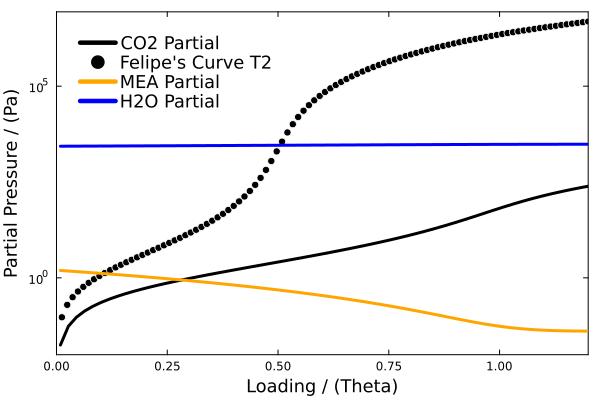

In [90]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing,
           yaxis = :log,
           legend = :topleft,
           legend_font = font(12),
           xlims = (0, 1.2))

plot!(plt, loading, partial_CO2, 
      color = "black", 
      line = (:path, 3), 
      label = "CO2 Partial")


plot!(plt, loadingexpfil, partialexpfil, 
      seriestype = :scatter, 
      color = "black", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Felipe's Curve T2")

plot!(plt, loading, partial_MEA, 
      color = "orange", 
      line = (:path, 3), 
      label = "MEA Partial")

plot!(plt, loading, partial_H2O, 
      color = "blue", 
      line = (:path, 3), 
      label = "H2O Partial")


xlabel!(plt, "Loading / (Theta)", xguidefontsize = 12)
ylabel!(plt, "Partial Pressure / (Pa)", yguidefontsize = 12)

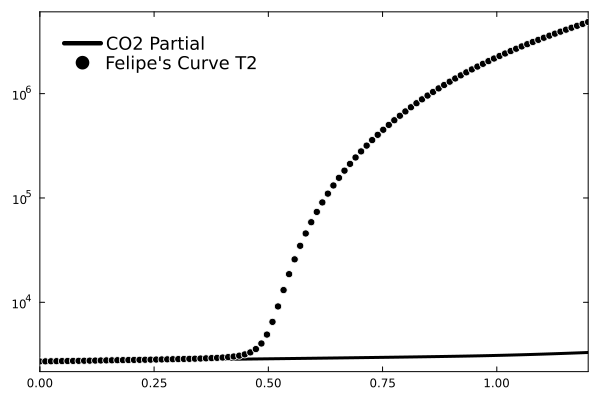